In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_excel('dataset.xlsx')

In [4]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [6]:
type(df)

pandas.core.frame.DataFrame

In [7]:
df.shape

(303, 14)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [9]:
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

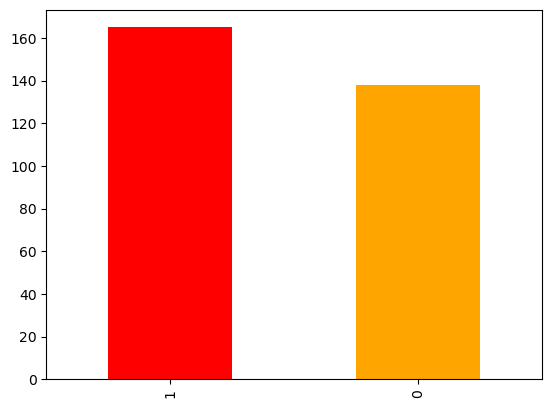

In [10]:
df['target'].value_counts().plot(kind='bar', color=['red','orange'] )
plt.show()

#### the dataset is balanced ie., target has almost same number of 1 and 0

In [11]:
df.isna().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

#### there are no null values so we proceed ahead


In [12]:
#checking the corr between all the columns wrt target
df.corr()['target'].abs().sort_values(ascending = False)

target      1.000000
exang       0.436757
cp          0.433798
oldpeak     0.430696
thalach     0.421741
ca          0.391724
slope       0.345877
thal        0.344029
sex         0.280937
age         0.225439
trestbps    0.144931
restecg     0.137230
chol        0.085239
fbs         0.028046
Name: target, dtype: float64

#### From above correlation we can say exang is highly correalted to target and fbs is least correlated

#### a.preliminary statistical summary of the data and explore the measures of central tendencies and spread of the data

In [13]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


<AxesSubplot:ylabel='Density'>

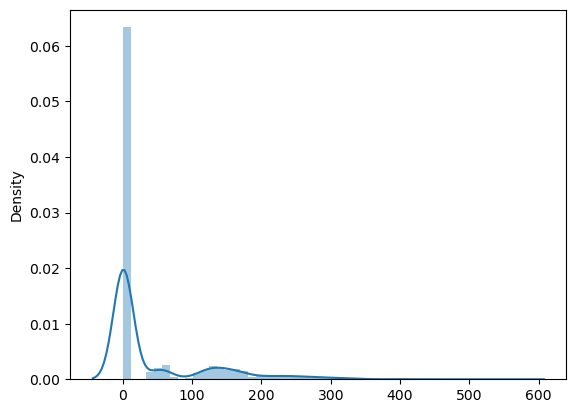

In [14]:
sns.distplot(df)

#### b.Identify the data variables which are categorical and describe and explore these variables using the appropriate tools, such as count plot 

In [15]:
categorial_value= []
continuous_value= []
for column in df.columns:
    if len(df[column].unique()) <= 10:
       categorial_value.append(column)
    else:
        continuous_value.append(column)

In [16]:
categorial_value

['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'target']

In [17]:
continuous_value

['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

In [ ]:
#Heart Disease Frequency vs Chest Pain
#chest pain type
#0: Typical angina: chest pain related decrease blood supply to the heart
#1: Atypical angina: chest pain not related to heart
#2: Non-anginal pain: typically esophageal spasms (non heart related)
#3: Asymptomatic: chest pain not showing signs of disease

In [71]:
pd.crosstab(df.cp,df.target)

target,0,1
cp,,
0,104,39
1,9,41
2,18,69
3,7,16


In [72]:
df['cp'].unique()

array([3, 2, 1, 0], dtype=int64)

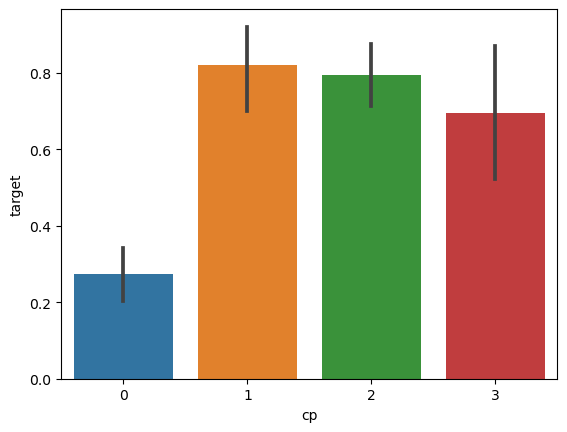

In [73]:
sns.barplot(df['cp'],df['target'])
plt.show()

#### We notice, that chest pain of '0', i.e. the ones with typical angina are much less likely to have heart problems

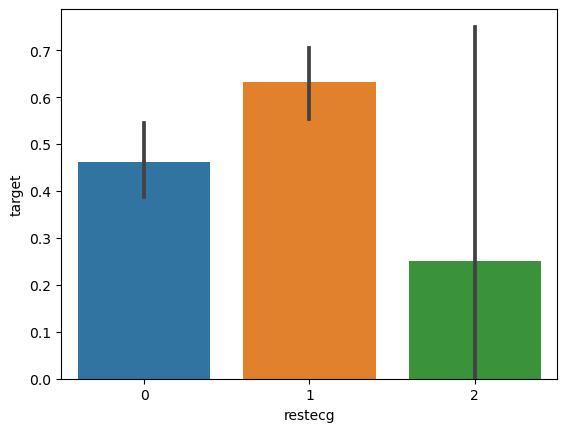

In [75]:
#Analysing the restecg feature
df["restecg"].unique()

sns.barplot(df["restecg"],df["target"])
plt.show()

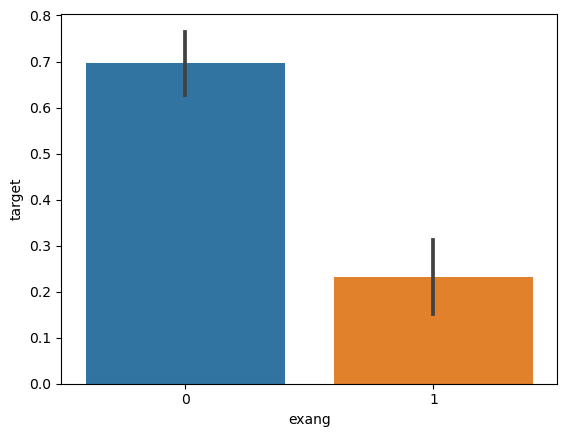

In [76]:
#Analysing the 'exang' feature
df['exang'].unique()

sns.barplot(df['exang'],df["target"])
plt.show()

[0 2 1]


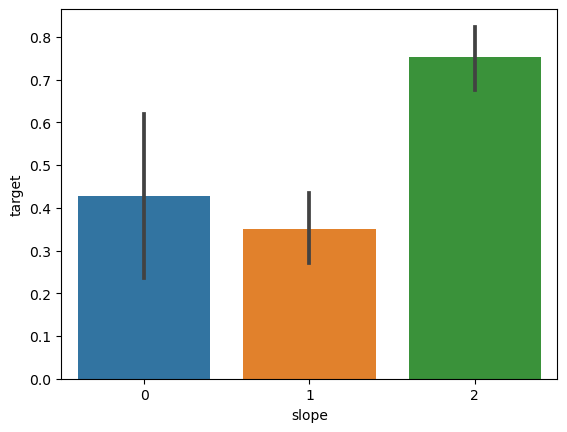

In [80]:
#Analysing the 'slope' feature
print(df['slope'].unique())

sns.barplot(df['slope'],df["target"])
plt.show()

[0 2 1 3 4]


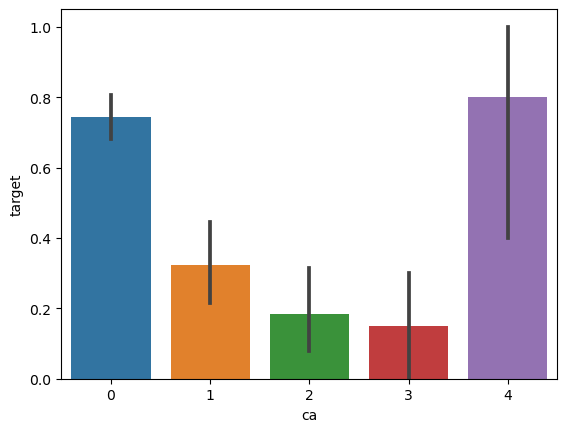

In [79]:
#Analysing the 'ca' feature
print(df['ca'].unique())

sns.barplot(df['ca'],df["target"])
plt.show()

[1 2 3 0]


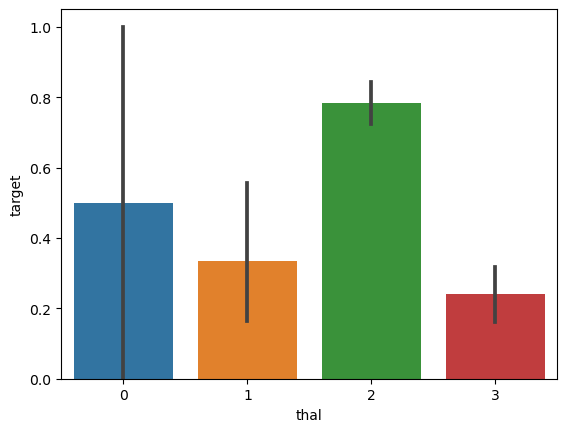

In [81]:
#Analysing the 'thal' feature
print(df['thal'].unique())

sns.barplot(df['thal'],df["target"])
plt.show()

#### c.Study the occurrence of CVD across the Age category

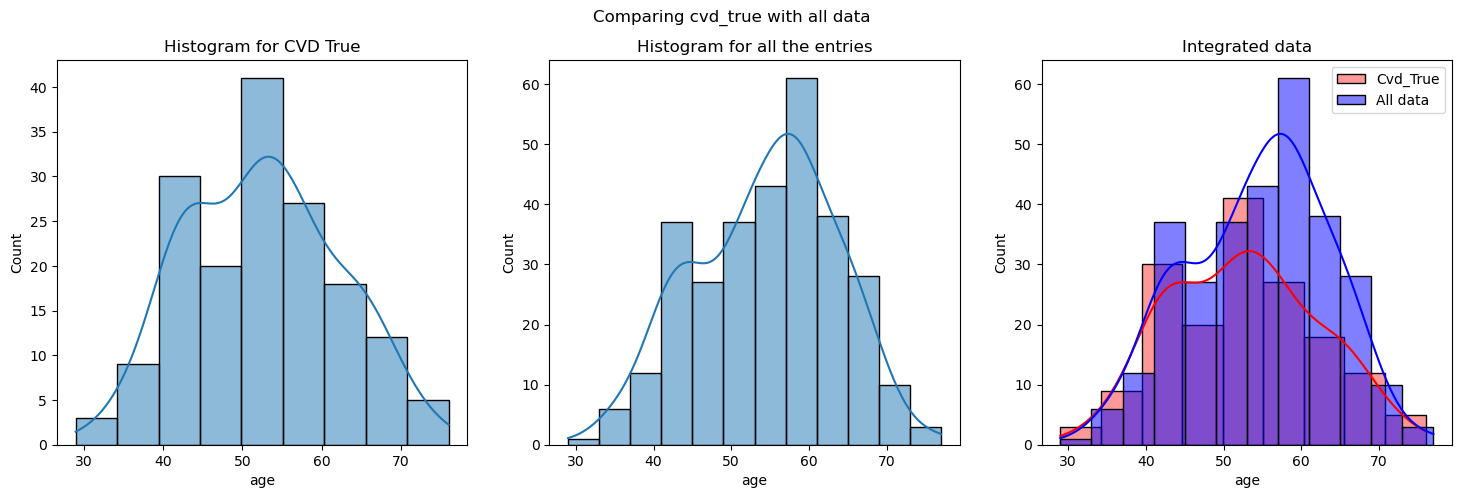

In [102]:
# Here we have data for only cvd true entries
cvd_true = df.loc[df.target == 1]

plt.figure(figsize=(18,5))
plt.subplot(1,3,1)
sns.histplot(x=cvd_true.age,kde=True)
plt.title('Histogram for CVD True')

plt.subplot(1,3,2)
sns.histplot(x=df.age,kde=True)
plt.title('Histogram for all the entries')

plt.subplot(1,3,3)
sns.histplot(x=cvd_true.age,kde=True,label='Cvd_True',color='red',alpha=0.4)
sns.histplot(x=df.age,kde=True,label='All data',color='blue',alpha=0.5)
plt.title('Integrated data')
plt.legend()
plt.suptitle('Comparing cvd_true with all data')
plt.show()

#### From above graph we can say that age group of 50 to 65 have high chances od CVD

#### d.Study the composition of all patients with respect to the Sex category

In [29]:
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

In [31]:
cvd_Vs_sex = pd.crosstab(df.target,df.sex)

In [32]:
cvd_Vs_sex

sex,0,1
target,,
0,24,114
1,72,93


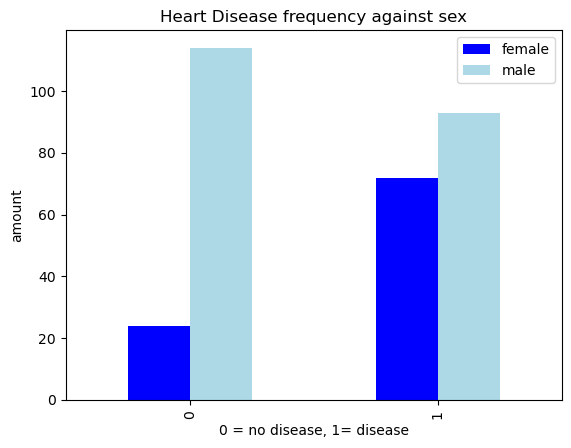

In [35]:
cvd_Vs_sex.plot(kind='bar',color=['blue','lightblue'])
plt.title('Heart Disease frequency against sex')
plt.xlabel('0 = no disease, 1= disease')
plt.ylabel('amount')
plt.legend(['female','male']);

#### e.Study if one can detect heart attacks based on anomalies in the resting blood pressure (trestbps) of a patient

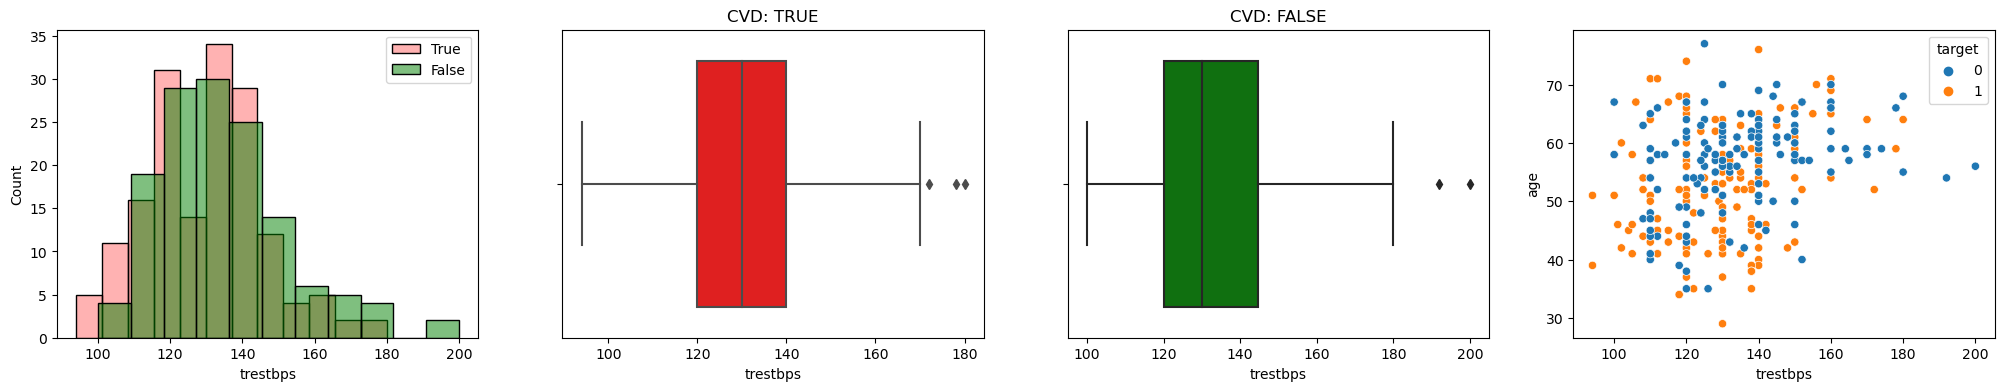

In [115]:
cvd_false = df.loc[df['target']==0]
plt.figure(figsize=(25,4))
# PLOTTING SUBPLOT_1
plt.subplot(1,4,1)
sns.histplot(cvd_true.trestbps,color='red',alpha=0.3, label='True')
sns.histplot(cvd_false.trestbps,color='green',alpha=0.5,label='False')
plt.legend()

# PLOTTING SUBPLOT_2
plt.subplot(1,4,2)
sns.boxplot(cvd_true.trestbps,color='red')
plt.title("CVD: TRUE")

# PLOTTING SUBPLOT_3
plt.subplot(1,4,3)
sns.boxplot(cvd_false.trestbps,color='green')
plt.title("CVD: FALSE")

plt.subplot(1,4,4)
sns.scatterplot(y=df.age, x=df.trestbps,hue=df.target)
plt.show()

#### f.Describe the relationship between cholesterol levels and a target variable 

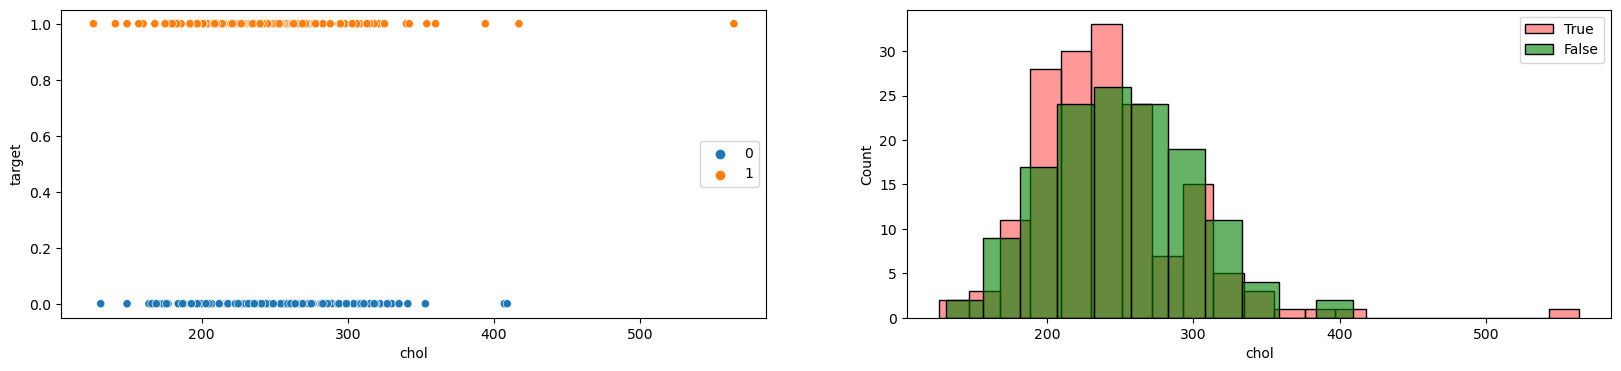

In [118]:
plt.figure(figsize=(20,4))
plt.subplot(1,2,1)
sns.scatterplot(x=df.chol, y=df.target, hue=df.target)
plt.legend(loc='center right')

plt.subplot(1,2,2)
sns.histplot(cvd_true.chol, color='r',alpha=0.4,label='True')
sns.histplot(cvd_false.chol, color='green',alpha=0.6,label='False')
plt.legend()

##### The people who develop CVD have much higher level of cholestrol sometimes and most are concentrated in the range of 200 - 300

#### g.State what relationship exists between peak exercising and the occurrence of a heart attack

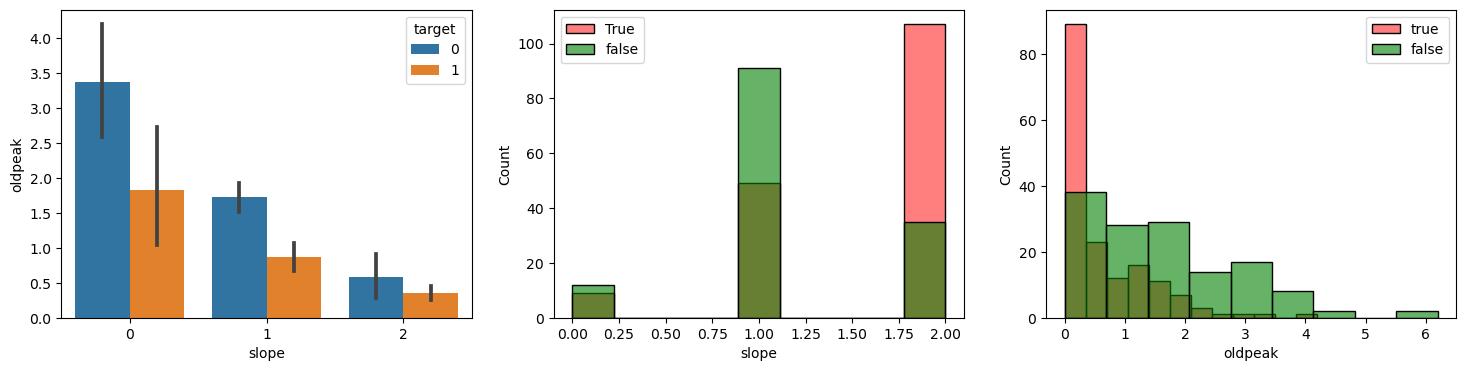

In [135]:
plt.figure(figsize=(18,4))
plt.subplot(1,3,1)
sns.barplot(x=df.slope,y=df.oldpeak,hue=df.target)

plt.subplot(1,3,2)
sns.histplot(x=cvd_true.slope,color = 'red', alpha=0.5,label='True')
sns.histplot(x=cvd_false.slope,color='green', alpha=0.6, label='false')
plt.legend()

plt.subplot(1,3,3)
sns.histplot(cvd_true.oldpeak, color = 'r', alpha=0.5, label= 'true')
sns.histplot(cvd_false.oldpeak, color='g', alpha=0.6, label='false')
plt.legend();

##### oldpeak is lower in people who developed CVD, slope: 2 was highest


#### h.Check if thalassemia is a major cause of CVD

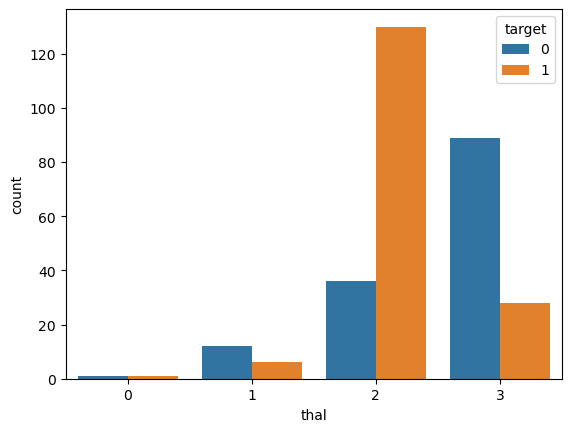

In [137]:
sns.countplot(df.thal,hue=df.target);

##### thal is on of the major causes for cvd and its seen more in 2

#### j.Use a pair plot to understand the relationship between all the given variables

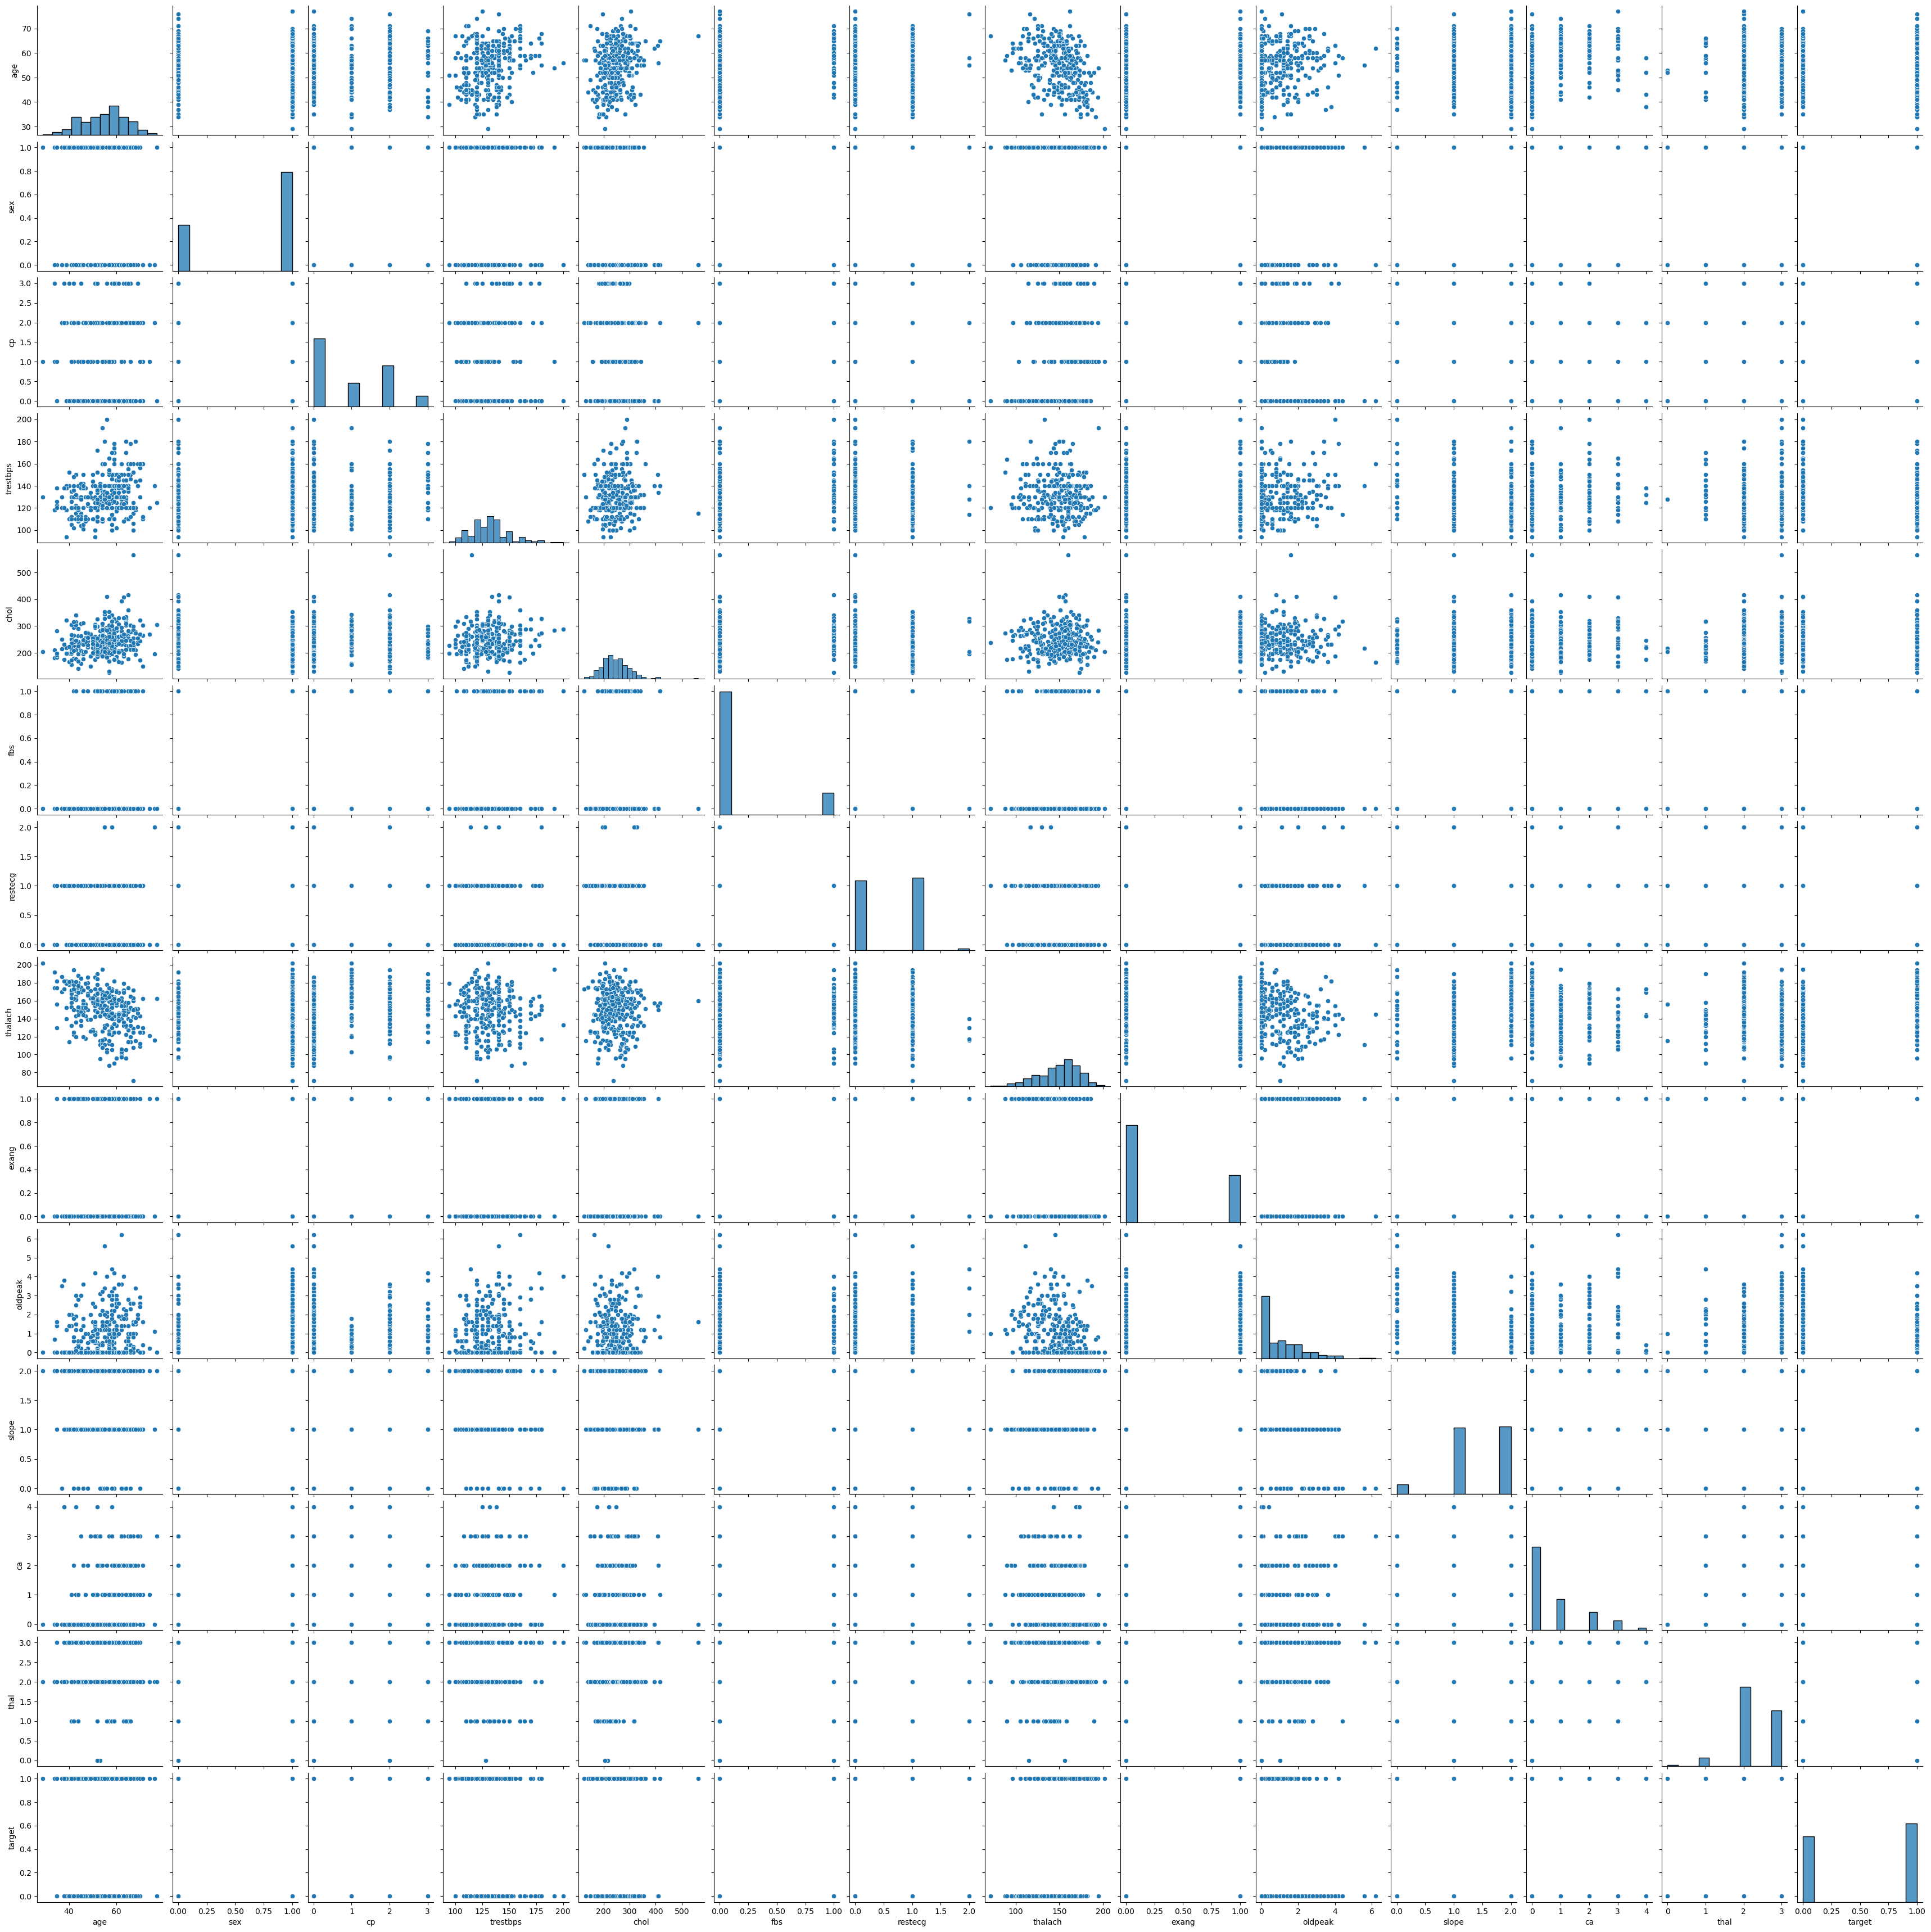

In [141]:
sns.pairplot(df)

#### 3.Build a baseline model to predict the risk of a heart attack using a logistic regression and random forest and explore the results while using correlation analysis and logistic regression (leveraging standard error and p-values from statsmodels) for feature selection

<AxesSubplot:>

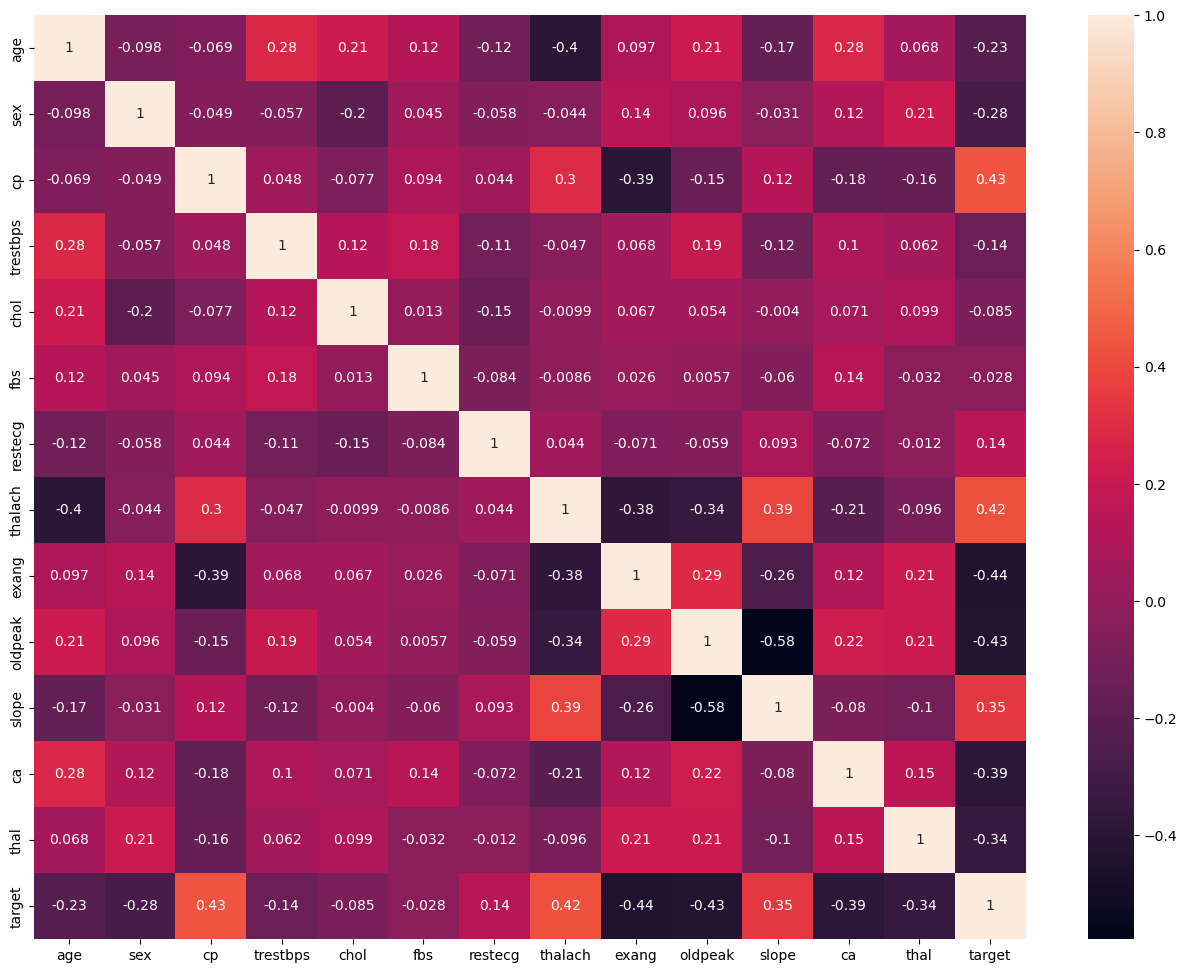

In [143]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True)

In [159]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,3.030000e+02,303.000000,303.000000,3.030000e+02,3.030000e+02,303.000000,303.000000,3.030000e+02,303.000000,3.030000e+02,303.000000,303.000000,303.000000,303.000000
mean,5.825923e-17,0.683168,0.966997,-7.146832e-16,-9.828955e-17,0.148515,0.528053,-5.203025e-16,0.326733,-3.140136e-16,1.399340,0.729373,2.313531,0.544554
std,1.001654e+00,0.466011,1.032052,1.001654e+00,1.001654e+00,0.356198,0.525860,1.001654e+00,0.469794,1.001654e+00,0.616226,1.022606,0.612277,0.498835
min,-2.797624e+00,0.000000,0.000000,-2.148802e+00,-2.324160e+00,0.000000,0.000000,-3.439267e+00,0.000000,-8.968617e-01,0.000000,0.000000,0.000000,0.000000
25%,-7.572802e-01,0.000000,0.000000,-6.638668e-01,-6.814943e-01,0.000000,0.000000,-7.061105e-01,0.000000,-8.968617e-01,1.000000,0.000000,2.000000,0.000000
50%,6.988599e-02,1.000000,1.000000,-9.273778e-02,-1.210553e-01,0.000000,1.000000,1.466343e-01,0.000000,-2.067053e-01,1.000000,0.000000,2.000000,1.000000
75%,7.316189e-01,1.000000,2.000000,4.783913e-01,5.456738e-01,0.000000,1.000000,7.151309e-01,1.000000,4.834512e-01,2.000000,1.000000,3.000000,1.000000
max,2.496240e+00,1.000000,3.000000,3.905165e+00,6.140401e+00,1.000000,2.000000,2.289429e+00,1.000000,4.451851e+00,2.000000,4.000000,3.000000,1.000000


In [162]:
df = pd.get_dummies(df, columns = categorial_value)

In [163]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


#### Standardising the data

In [164]:
from sklearn.preprocessing import StandardScaler

scale = StandardScaler()
scaled_columns = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']
df[scaled_columns] = scale.fit_transform(df[scaled_columns])

In [165]:
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,0.952197,1,3,0.763956,-0.256334,1,0,0.015443,0,1.087338,0,0,1,1
1,-1.915313,1,2,-0.092738,0.072199,0,1,1.633471,0,2.122573,0,0,2,1
2,-1.474158,0,1,-0.092738,-0.816773,0,0,0.977514,0,0.310912,2,0,2,1
3,0.180175,1,1,-0.663867,-0.198357,0,1,1.239897,0,-0.206705,2,0,2,1
4,0.290464,0,0,-0.663867,2.082050,0,1,0.583939,1,-0.379244,2,0,2,1


#### TRain test split

In [166]:
from sklearn.model_selection import train_test_split

prd = df.drop('target',axis=1)
target = df['target']

X_train,X_test,y_train,y_test = train_test_split(prd,target,test_size=0.2,random_state=0)

In [167]:
X_train.shape

(242, 13)

In [168]:
X_test.shape

(61, 13)

In [169]:
y_train.shape

(242,)

In [170]:
y_test.shape

(61,)

In [171]:
from sklearn.metrics import accuracy_score

#### LOgistic Regression

In [172]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

lr.fit(X_train,y_train)

y_pred_lr = lr.predict(X_test)

In [173]:
y_pred_lr

array([0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1], dtype=int64)

In [176]:
y_test

225    0
152    1
228    0
201    0
52     1
      ..
146    1
302    0
26     1
108    1
89     1
Name: target, Length: 61, dtype: int64

In [177]:
score_lr = round(accuracy_score(y_pred_lr,y_test)*100,2)

In [179]:
print('the accuracy score obtained in LogisticRegression in perc is:', score_lr)

the accuracy score obtained in LogisticRegression in perc is: 85.25


In [181]:
#SVM
from sklearn import svm

sv = svm.SVC(kernel='linear')

sv.fit(X_train, y_train)

Y_pred_svm = sv.predict(X_test)

In [183]:
score_svm = round(accuracy_score(Y_pred_svm,y_test)*100,2)
print('the accuracy score obtained in SVM in perc is:', score_svm)

the accuracy score obtained in SVM in perc is: 81.97


In [206]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(criterion='gini',
                            max_depth = 7,
                            n_estimators=200,
                            min_samples_split=5,
                            random_state=0)

In [207]:
rf.fit(X_train,y_train)

RandomForestClassifier(max_depth=7, min_samples_split=5, n_estimators=200,
                       random_state=0)

In [208]:
rf.feature_importances_

array([0.07587559, 0.05011891, 0.13729465, 0.06393767, 0.06085542,
       0.0073731 , 0.0145391 , 0.10275879, 0.06863773, 0.11111434,
       0.03723668, 0.14748638, 0.12277163])

In [209]:
df.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

##### 0.15878152 = ca most important feature

In [210]:
y_pred_rf = rf.predict(X_test)

In [211]:
rf_score= round(accuracy_score(y_pred_rf,y_test)*100,2)

In [212]:
print('the accuracy score obtained in RandomForest in perc is:',rf_score)

the accuracy score obtained in RandomForest in perc is: 86.89


In [213]:
from sklearn.model_selection import cross_val_score
cross_val_score(rf,X_train,y_train,cv=5)

array([0.75510204, 0.79591837, 0.875     , 0.85416667, 0.875     ])

In [214]:
from sklearn.metrics import classification_report
print(classification_report(y_pred_rf,y_test))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85        25
           1       0.91      0.86      0.89        36

    accuracy                           0.87        61
   macro avg       0.86      0.87      0.87        61
weighted avg       0.87      0.87      0.87        61



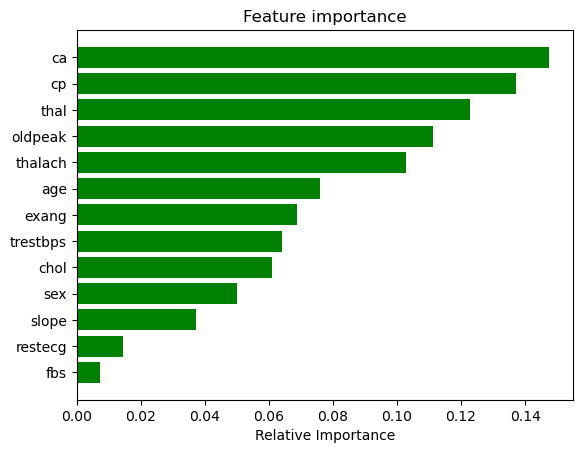

In [215]:
feature = df.columns
importances = rf.feature_importances_
indices = np.argsort(importances) #sorting index in ascending

plt.title('Feature importance')
plt.barh(range(len(indices)), importances[indices], color = 'g',align= 'center')
plt.yticks(range(len(indices)),[feature[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

### The End